In [24]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
from PIL import Image
%matplotlib inline

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [2]:
pdb='/ipynb_files/CHEM96_06/Project_2/ABL1.pdb'
trajectory='/ipynb_files/CHEM96_06/Project_2/ABL1.xtc'
outdir='/ipynb_files/CHEM96_06/Project_2/outdir'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: /ipynb_files/CHEM96_06/Project_2/outdir
pdb: /ipynb_files/CHEM96_06/Project_2/ABL1.pdb
trjaectory: /ipynb_files/CHEM96_06/Project_2/ABL1.xtc


In [3]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [4]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [5]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [6]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [7]:
dssp[0]

array(['C', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'E', 'C', 'C', 'E', 'E', 'E', 'E', 'E', 'C',
       'C', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C',
       'C', 'E', 'E', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C',
       'E', 'E', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'E', 'E', 'E',
       'C', 'H', 'H', 'H', 'C', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C',
       'C', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'E', 'E', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'C', 'C', 'H', 'H', 'H',
       'H', 'H', 'H', 'C', 'E', 'E', 'C', 'C', 'C', 'H', 'H', 'H

In [8]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

(250.0, 300.0)

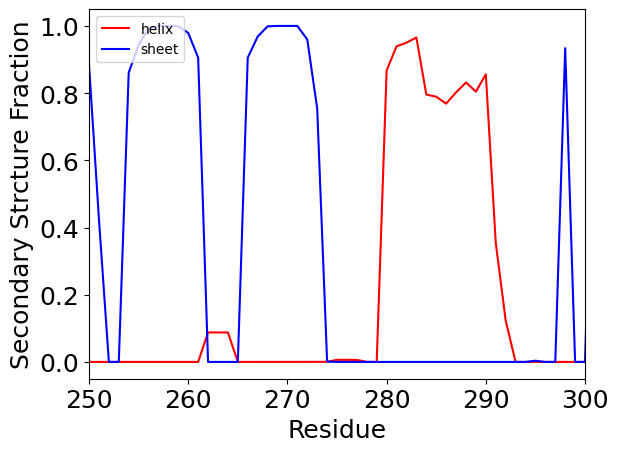

In [9]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(250,300)


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

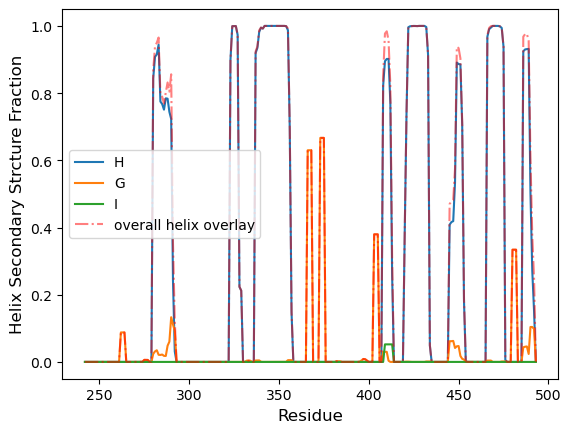

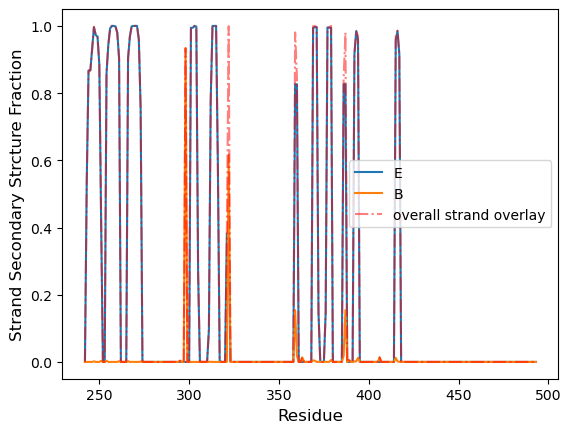

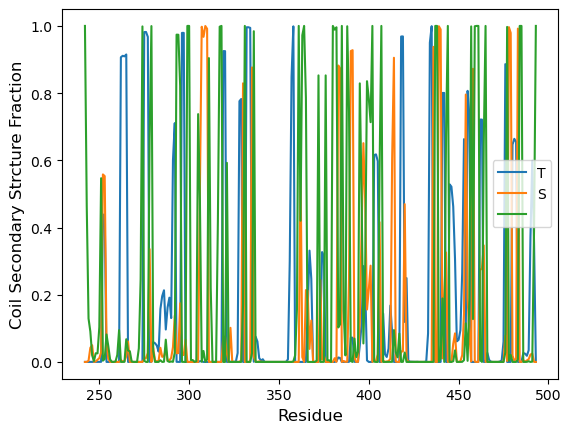

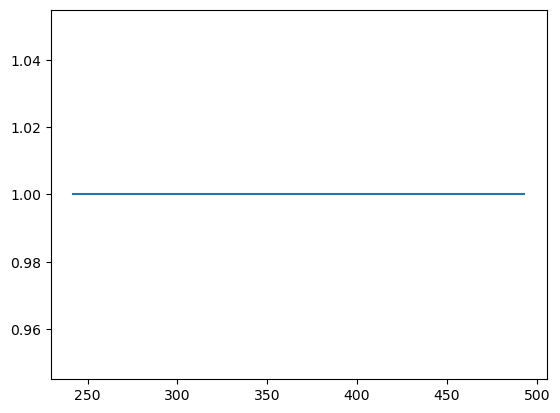

In [10]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

dssp_full=md.compute_dssp(trj,simplified=False)
def decompose_simple(dssp_full,simplified_type):
    if simplified_type == 'H':
        types = ['H','G','I']
    elif simplified_type == 'E':
        types = ['E','B']
    elif simplified_type == 'C':
        types = ['T','S',' ']
    else:
        print("Invalid simplified type")
        return
    
    counts = np.empty(len(types), dtype=np.ndarray)
    probE = np.empty(len(types), dtype=np.ndarray)
    for i in range(len(types)):
        counts[i] = np.copy(dssp_full)
        counts[i][counts[i]!=types[i]] = 0
        counts[i][counts[i]==types[i]] = 1
        
        counts[i]=counts[i].astype(int)
        
        probE[i]=np.sum(counts[i], axis=0).astype(float)/len(counts[i])
    
    return probE, types
        
Hprobs, types = decompose_simple(dssp_full,'H')
for i in range(len(Hprobs)):
    plt.plot(residue_num,Hprobs[i], label=types[i])

plt.plot(residue_num,Hprop,'r-.',label='overall helix overlay', alpha=0.5)
plt.xlabel('Residue', size=12)
plt.ylabel('Helix Secondary Strcture Fraction', size=12)
plt.legend()
plt.show()

Eprobs, types = decompose_simple(dssp_full,'E')
for i in range(len(Eprobs)):
    plt.plot(residue_num,Eprobs[i], label=types[i])

plt.plot(residue_num,Eprop,'r-.',label='overall strand overlay', alpha=0.5)
plt.xlabel('Residue', size=12)
plt.ylabel('Strand Secondary Strcture Fraction', size=12)
plt.legend()
plt.show()

Cprobs, types = decompose_simple(dssp_full,'C')
for i in range(len(Cprobs)):
    plt.plot(residue_num,Cprobs[i], label=types[i])
plt.xlabel('Residue', size=12)
plt.ylabel('Coil Secondary Strcture Fraction', size=12)
plt.legend()
plt.show()

#sanity check
total=np.sum(np.vstack((Hprobs[0],Hprobs[1],Hprobs[2],Eprobs[0],Eprobs[1],Cprobs[0],Cprobs[1],Cprobs[2])),axis=0)
plt.plot(residue_num,total)

***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

In [11]:
#### Challenge Problem Write a Function to Compute the Population of Any Secondary Structure Type
#### Write a loop to plot all populations
#### Write code to output the residue numbers of every residue with > 90% each SS type

def list_90_percent(dssp_full,types):
    #array will store values according to the documentation (ex. idx0='A')
    probE = np.empty(len(types), dtype=np.ndarray)
    storage = np.empty(len(types), dtype=np.ndarray)
    counts = np.empty(len(types), dtype=np.ndarray)
    total_frames = trj.n_frames
    
    for i in range(len(types)):
        counts[i] = np.copy(dssp_full)
        counts[i][counts[i]!=types[i]] = 0
        counts[i][counts[i]==types[i]] = 1
        
        counts[i]=counts[i].astype(int)
        
        probE[i]=np.sum(counts[i], axis=0).astype(float)/total_frames
        
        
        
        for j in range(len(probE[i])):
            if probE[i][j] > 0.9:
                storage[i] = np.append(storage[i], j+242)
        
        storage[i] = np.delete(storage[i], 0)
        
    return storage

types = ['H','G','I','E','B','T','S',' ']
storage = list_90_percent(dssp_full,types)
for i in range(len(storage)):
    print("Residues with more than 90% population of " + types[i] + ": " + str(storage[i]))

Residues with more than 90% population of H: [281 282 283 324 325 326 327 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 410 411 422 423 424 425 426 427 428 429
 430 431 432 433 466 467 468 469 470 471 472 473 474 475 486 487 488 489]
Residues with more than 90% population of G: []
Residues with more than 90% population of I: []
Residues with more than 90% population of E: [246 247 248 249 255 256 257 258 259 260 261 266 267 268 269 270 271 272
 301 302 303 304 313 314 315 369 370 371 377 378 379 392 393 394 415 416
 417]
Residues with more than 90% population of B: [298]
Residues with more than 90% population of T: [262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]
Residues with more than 90% population of S: [307 308 309 310 390 391 414 436 439 440 478 479 483]
Residues with more than 90% population of  : [242 274 279 293 294 299 300 311 317 318 331 336 361 363 364 380 381 382
 385 388 402 407 437 438 444 457 459 460 461 465 4

***HOMEWORK Problem 2***

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

**residue 290 coupled to 382**

290
Residue 290
helix_frames: (array([   2,    3,    4, ..., 3997, 3998, 3999], dtype=int64),) 3424
beta_frames: (array([], dtype=int64),)
coil_frames: (array([   0,    1,   16,   41,   89,   91,   95,   96,   97,   98,   99,
        106,  107,  110,  113,  114,  115,  125,  126,  156,  160,  163,
        164,  165,  166,  168,  222,  223,  231,  233,  236,  264,  266,
        280,  357,  358,  359,  360,  361,  362,  364,  367,  368,  374,
        377,  378,  379,  382,  383,  384,  388,  390,  396,  398,  399,
        406,  416,  417,  430,  437,  449,  452,  454,  458,  462,  464,
        465,  467,  470,  485,  496,  498,  500,  522,  523,  524,  525,
        536,  538,  560,  594,  601,  602,  605,  626,  627,  635,  758,
        773,  783,  787,  792,  796,  800,  802,  803,  805,  806,  821,
        822,  834,  835,  836,  837,  838,  841,  844,  864,  868,  878,
        879,  880,  886,  887,  888,  891,  902,  907,  908,  912,  917,
        948,  949,  951,  953,  962,  964,  

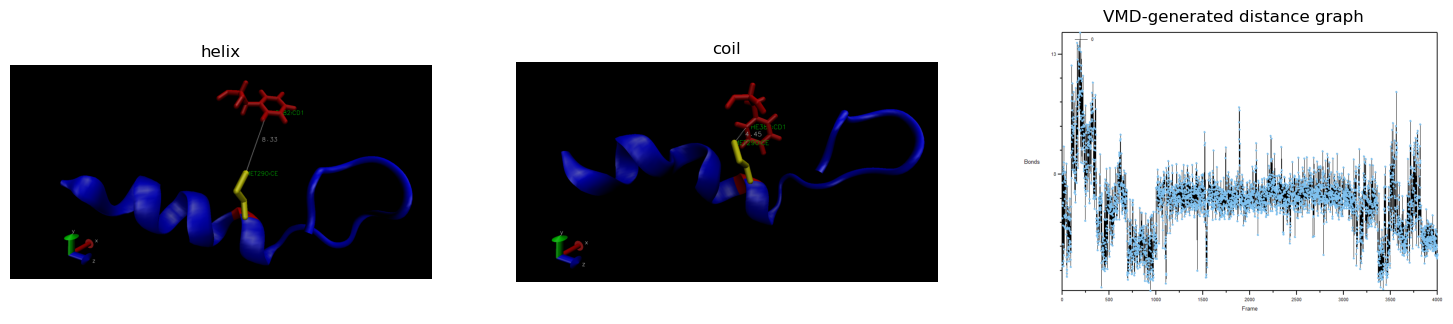

In [34]:
#Find all the frames where a given residue is H or E
residue_number=290
array_index=residue_number-242
print(np.asarray(residue_num)[array_index])
helix_frames=np.where(dssp[:,array_index]=='H')
beta_frames=np.where(dssp[:,array_index]=='E')
coil_frames=np.where(dssp[:,array_index]=='C')

print("Residue %s"%np.asarray(residue_num)[array_index])
print("helix_frames:",helix_frames, len(helix_frames[0]))
print("beta_frames:",beta_frames)
print("coil_frames:",coil_frames)

img_helix=np.asarray(Image.open('/ipynb_files/CHEM96_06/Project_2/photos/RES290_HELIX.png'))
img_coil=np.asarray(Image.open('/ipynb_files/CHEM96_06/Project_2/photos/RES290_COIL.png'))
VMD_graph=np.asarray(Image.open('/ipynb_files/CHEM96_06/Project_2/photos/MET-ARO_distance.png'))

fig, axs = plt.subplots(1,3)
fig.set_size_inches(18.5,10)
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].title.set_text('helix')
axs[1].title.set_text('coil')
axs[2].title.set_text('VMD-generated distance graph')
axs[0].imshow(img_helix)
axs[1].imshow(img_coil)
axs[2].imshow(VMD_graph)

print("We notice that the methionine-aromatic motif appears to drive the formation and breaking of the helix, as exemplified")
print("Upon methionine-aromatic insertion, the helix may be broken by the movement of the aromatic ring on residue 382")

In [35]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [62]:
np.shape(phis[:,0])

[[-2.765634   -1.1210437  -1.2507035  ...  2.9329174  -1.1141282
  -1.2329948 ]
 [-2.9517007  -0.608509   -1.4209987  ... -3.0500753  -1.36551
  -1.2368906 ]
 [-3.0764241   1.0259423  -1.093818   ...  2.9714725  -1.2795688
  -1.2383192 ]
 ...
 [-2.9040706  -0.8999648  -1.0286304  ...  1.4937726  -1.2471117
  -0.84508747]
 [-2.9789205  -1.0420715  -1.1584716  ...  1.567298   -1.2404625
  -1.074033  ]
 [-3.0741124  -0.99509585 -1.2482058  ...  1.6071357  -0.9113053
  -0.6248916 ]]
4000


In [37]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [38]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

In [39]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




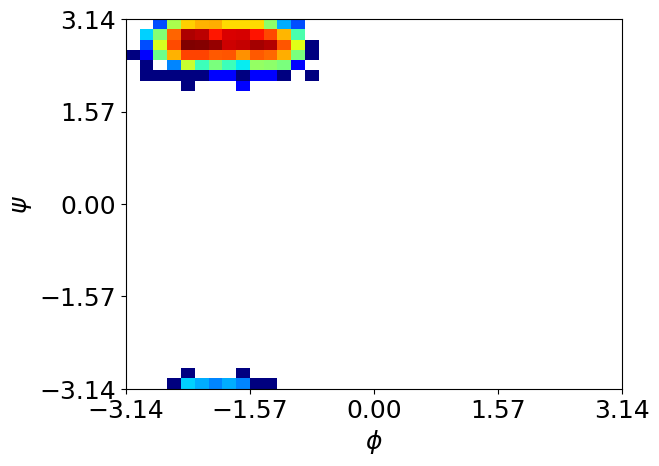

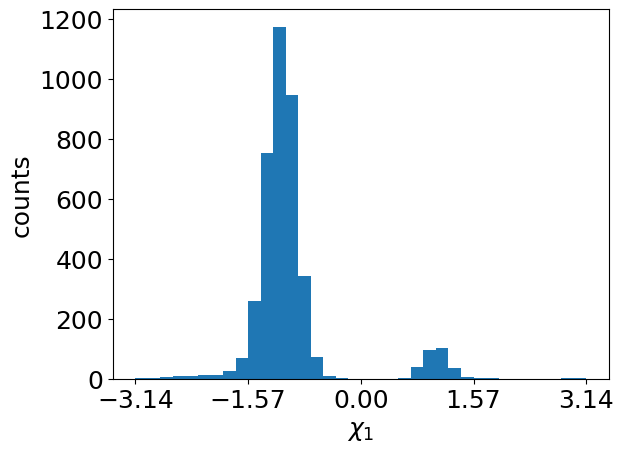

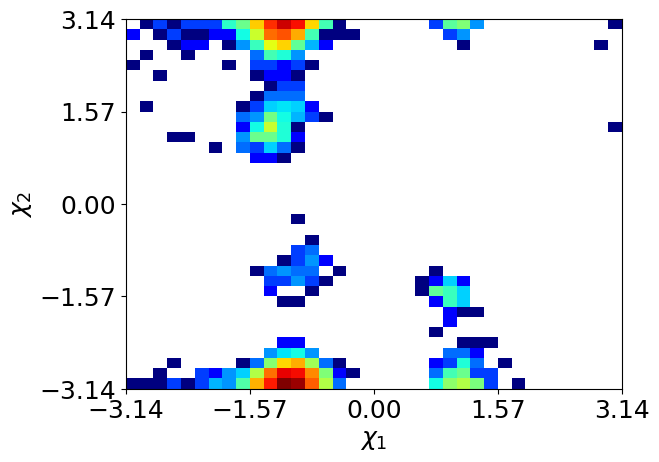

In [40]:
plot_phipsi(308)
plt.clf()
plot_chi(308)

In [41]:
#Lets Visualize Some Rotamers
#Lets Find all the VAL residues and plot thier X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
VAL_indices=np.where(resnames=='VAL')
Val_resnums=resnums[VAL_indices]
Val_resnums

array([256, 260, 268, 270, 280, 289, 299, 304, 335, 338, 339, 371, 377,
       379, 422, 427, 448, 468])

Residue 256


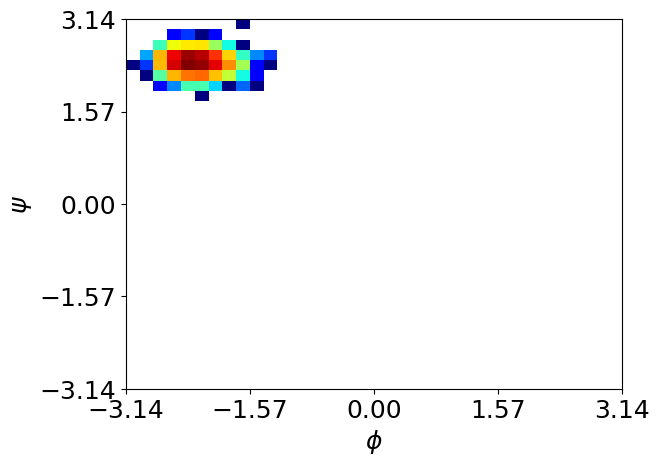

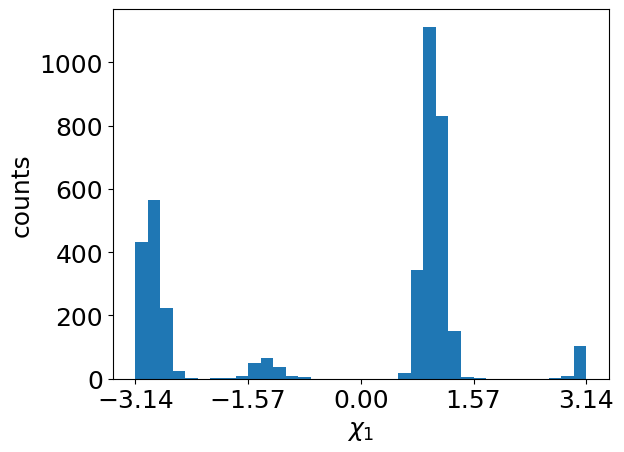

Residue 260


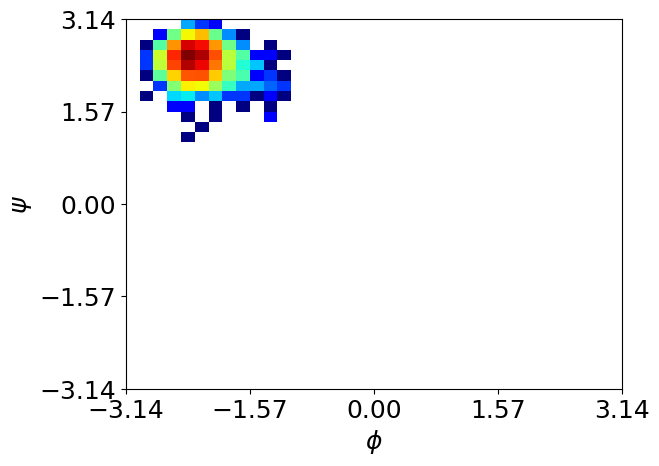

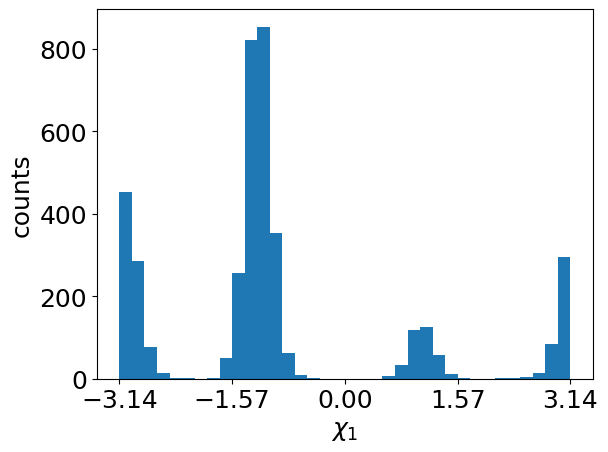

Residue 268


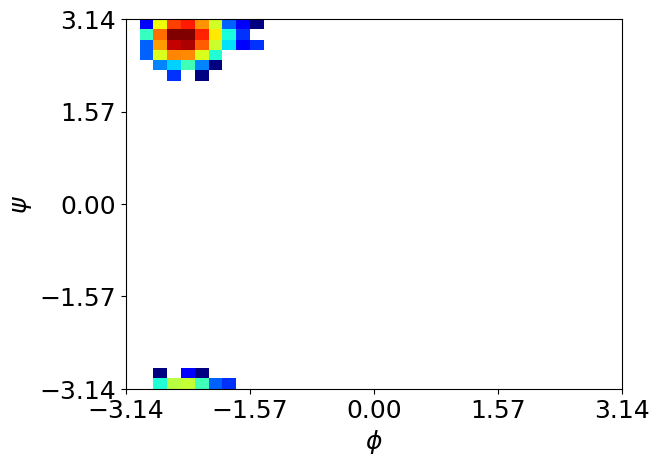

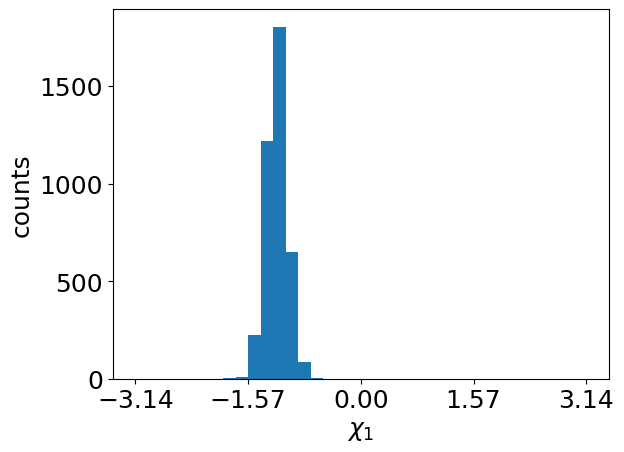

Residue 270


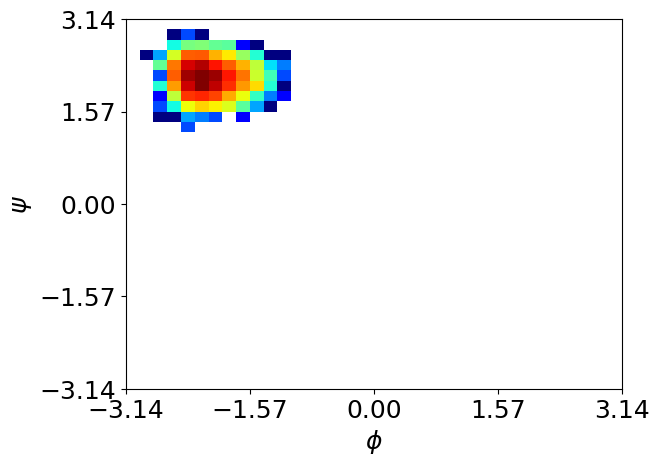

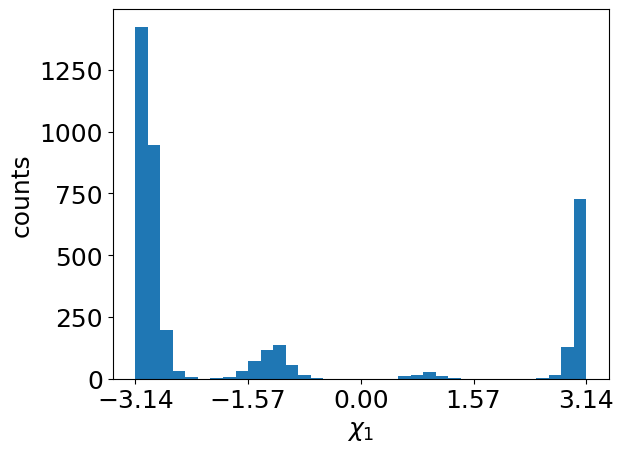

Residue 280


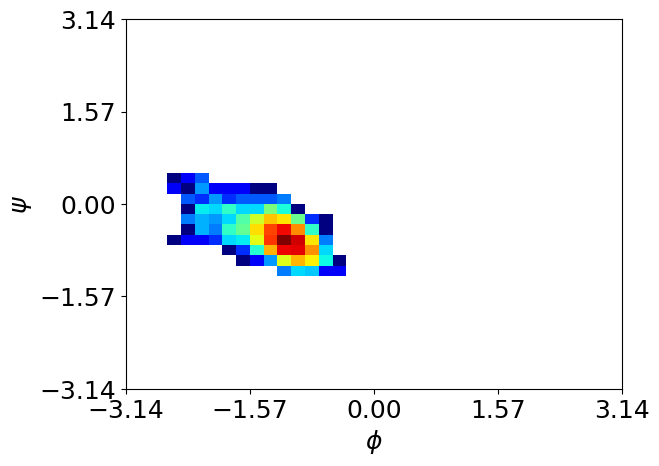

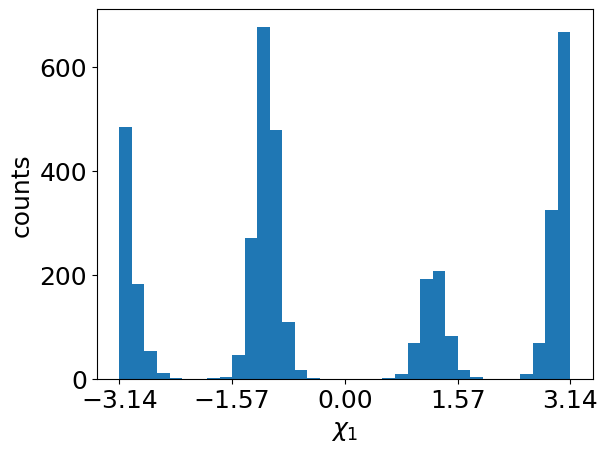

Residue 289


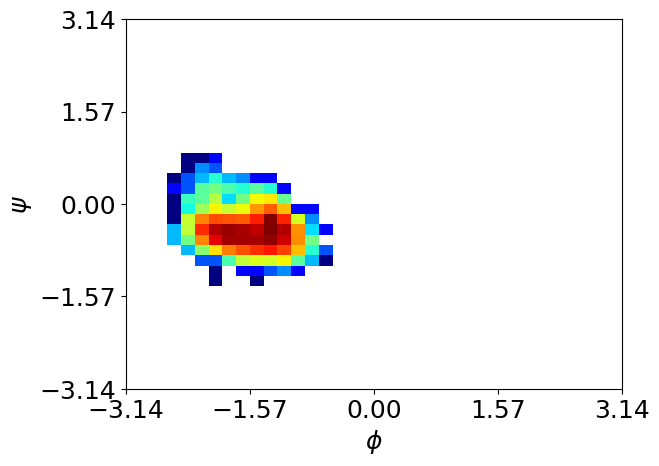

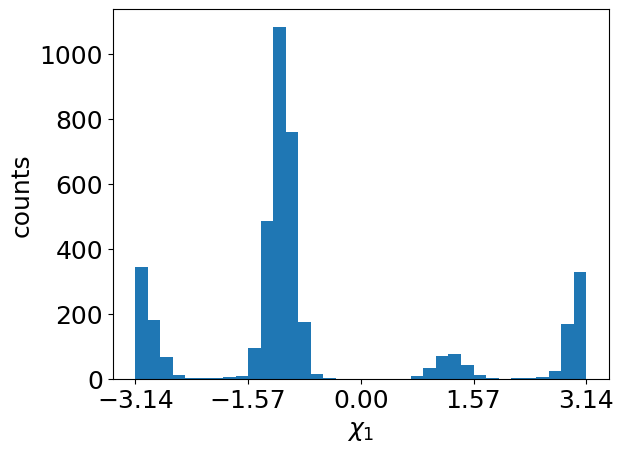

Residue 299


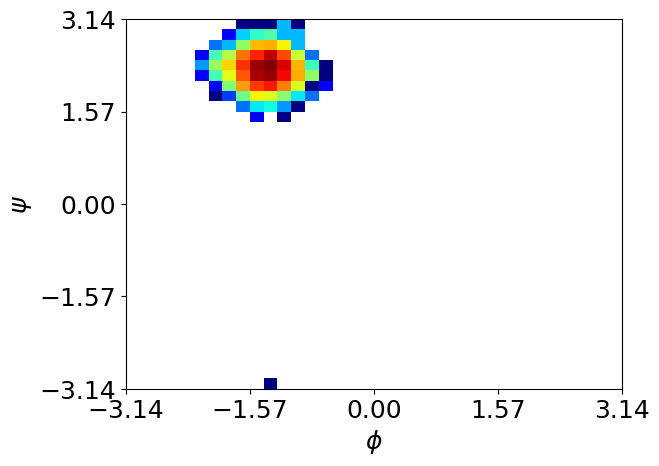

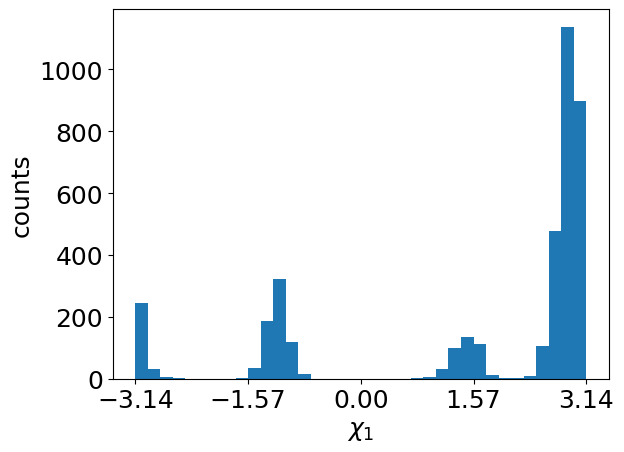

Residue 304


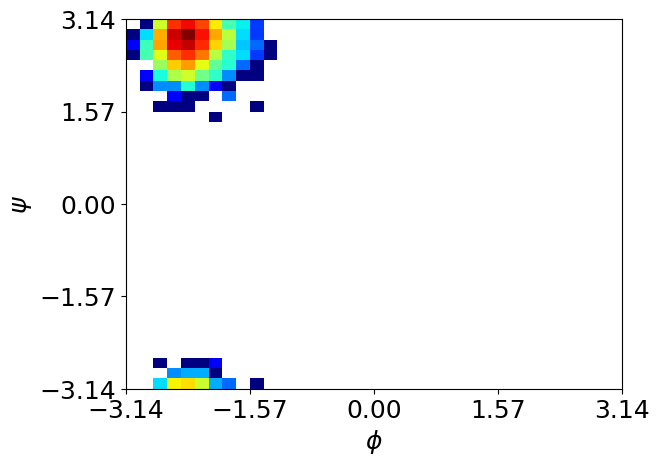

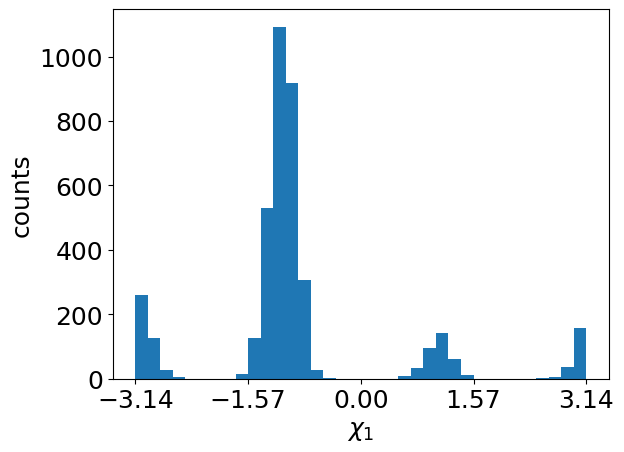

Residue 335


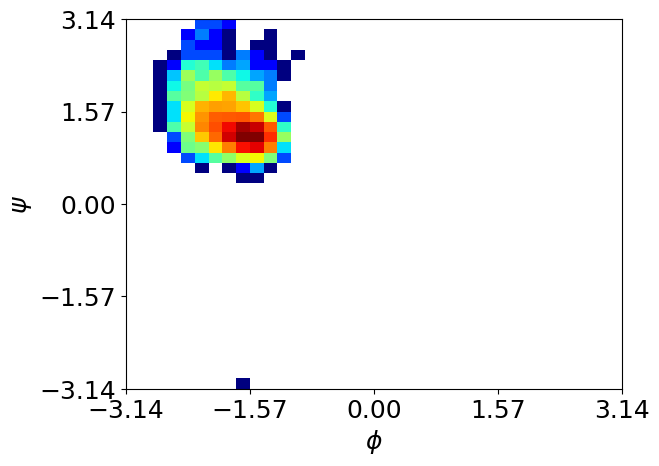

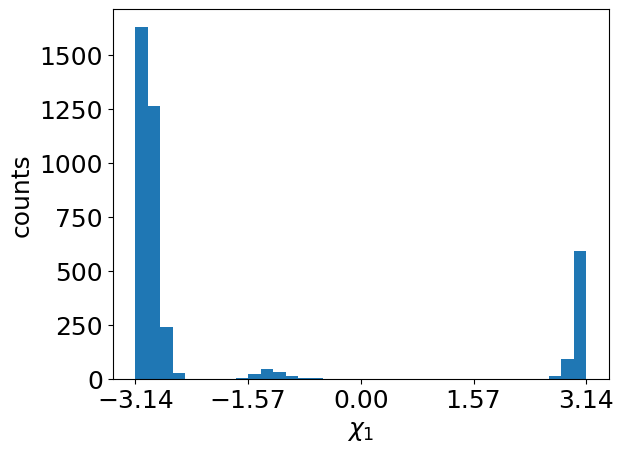

Residue 338


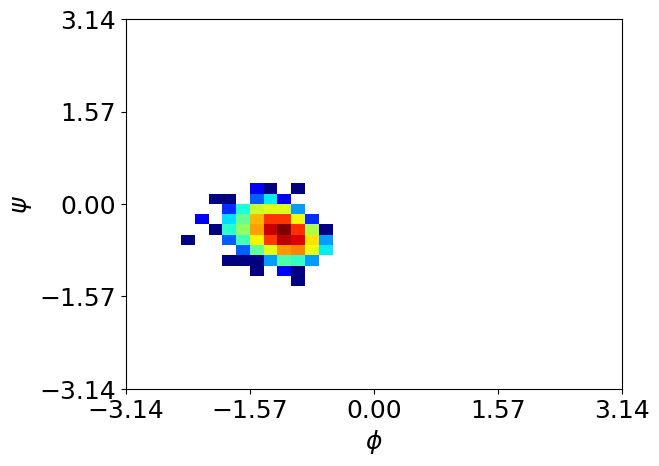

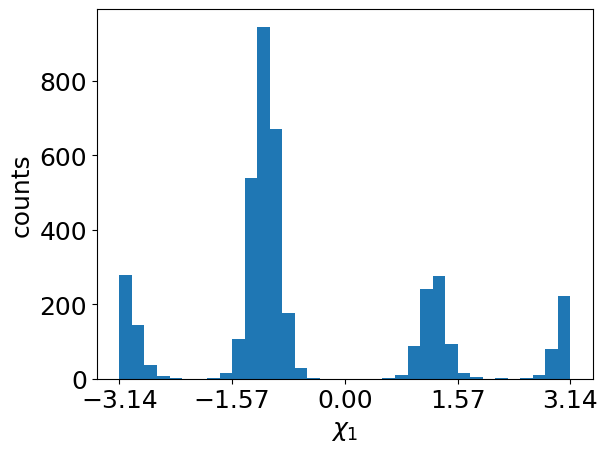

Residue 339


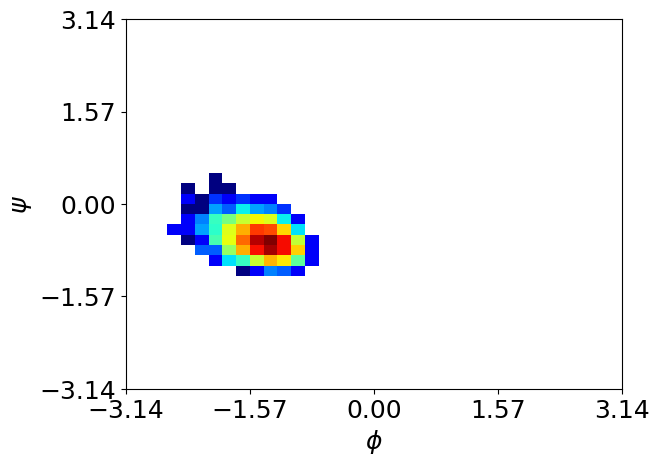

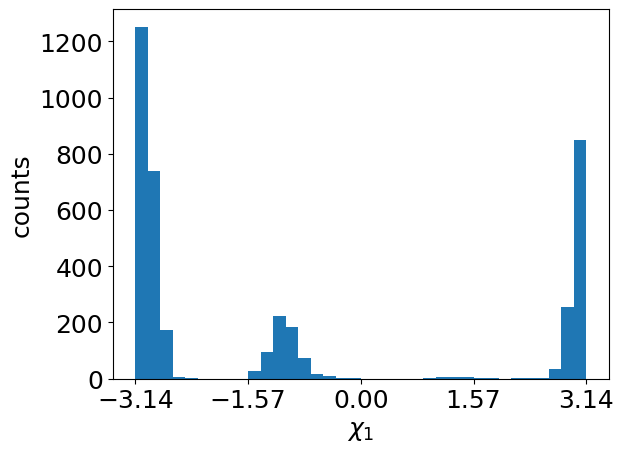

Residue 371


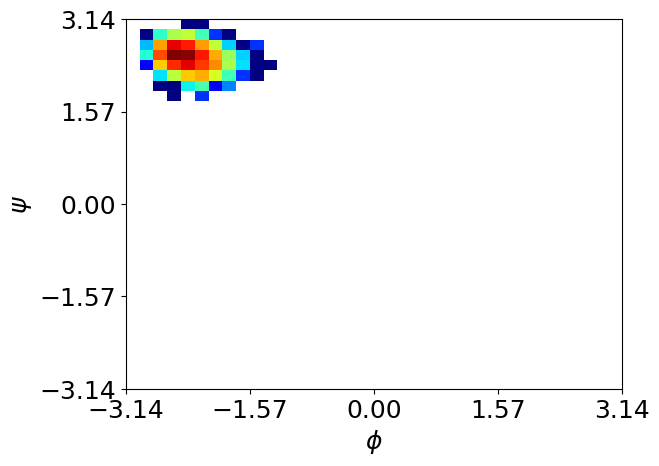

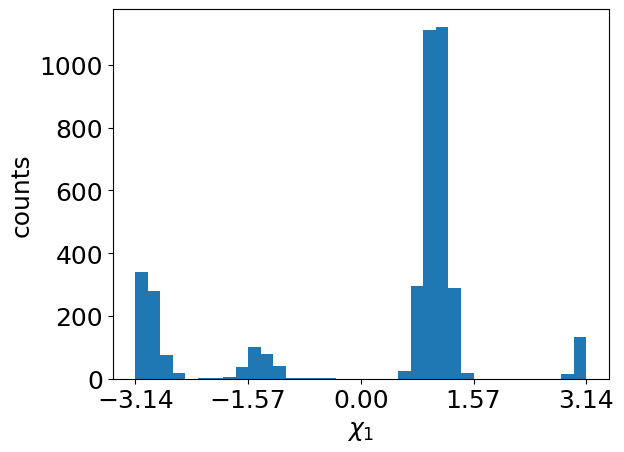

Residue 377


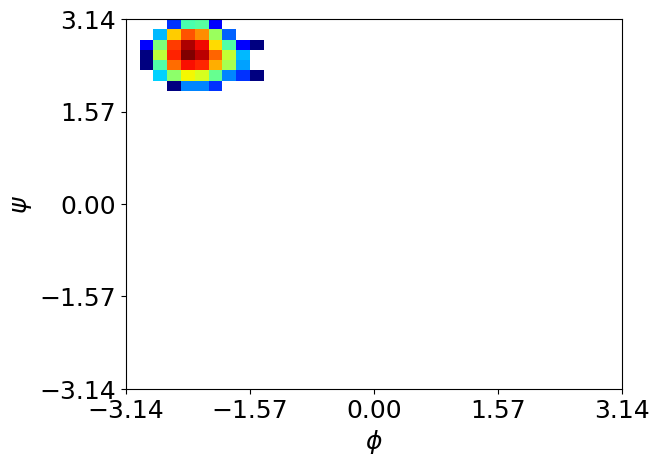

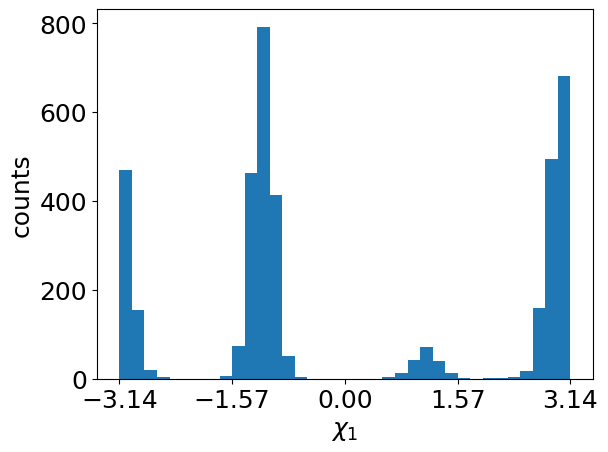

Residue 379


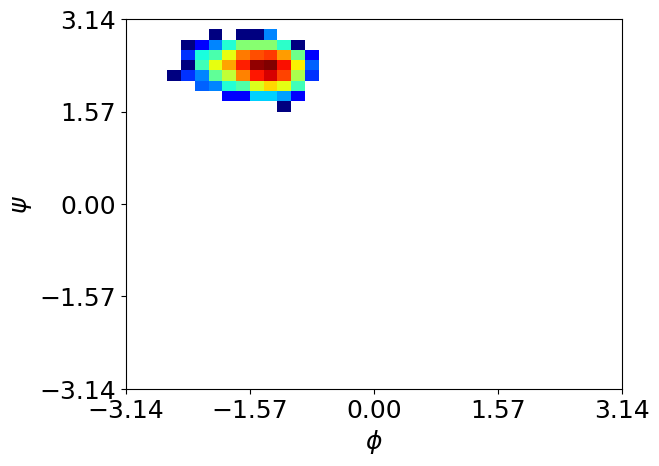

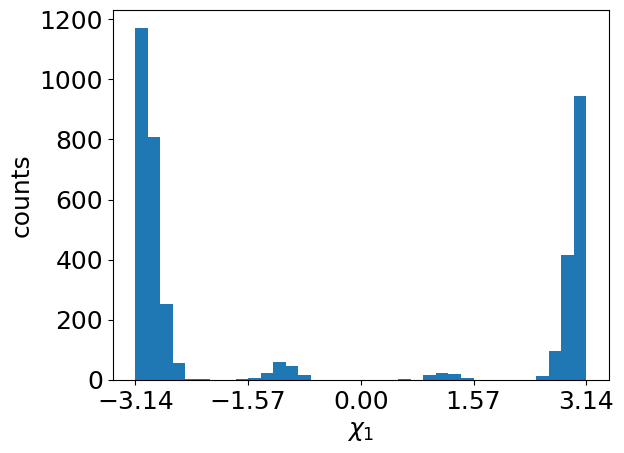

Residue 422


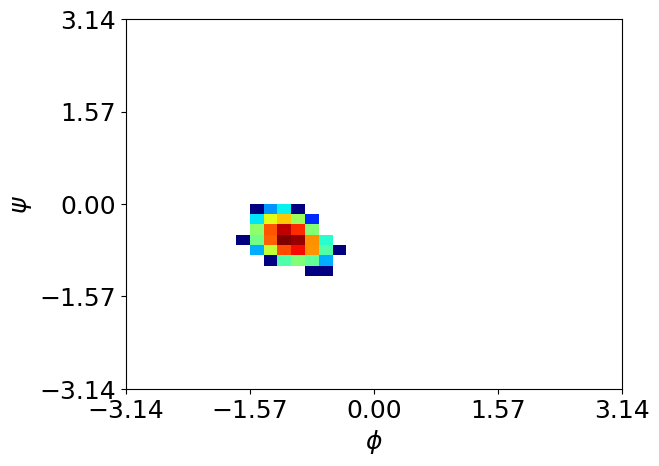

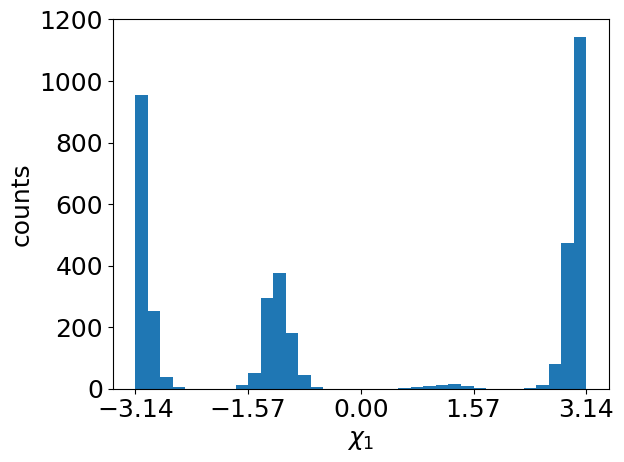

Residue 427


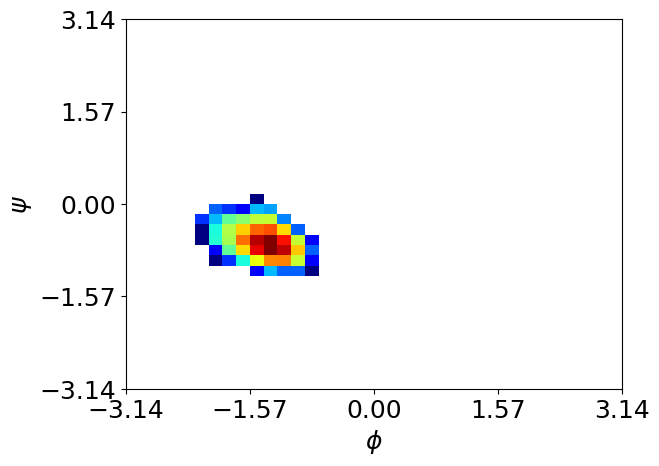

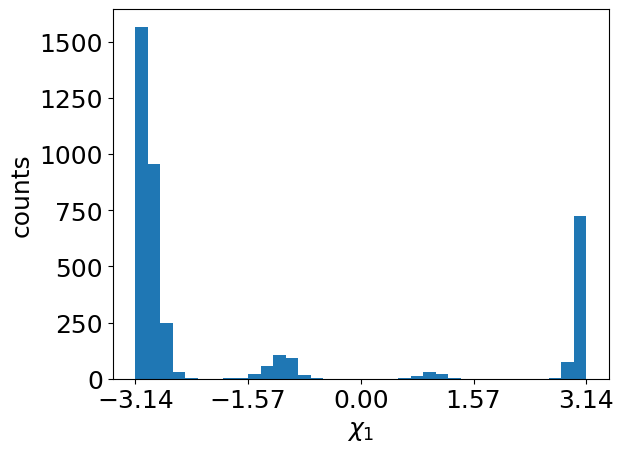

Residue 448


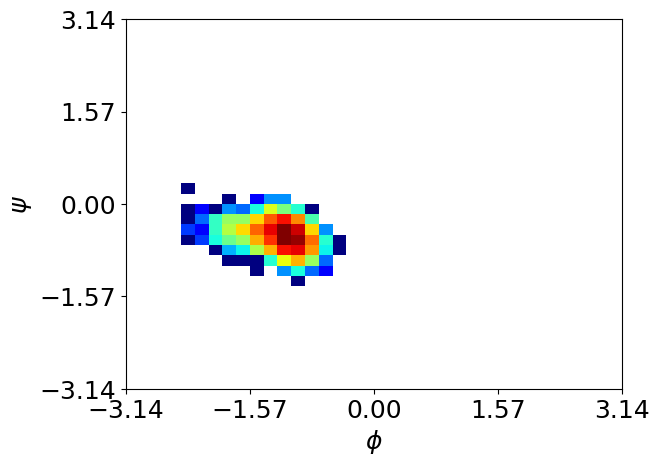

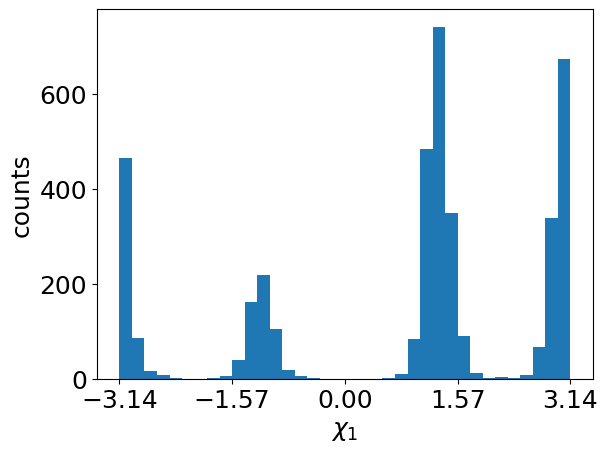

Residue 468


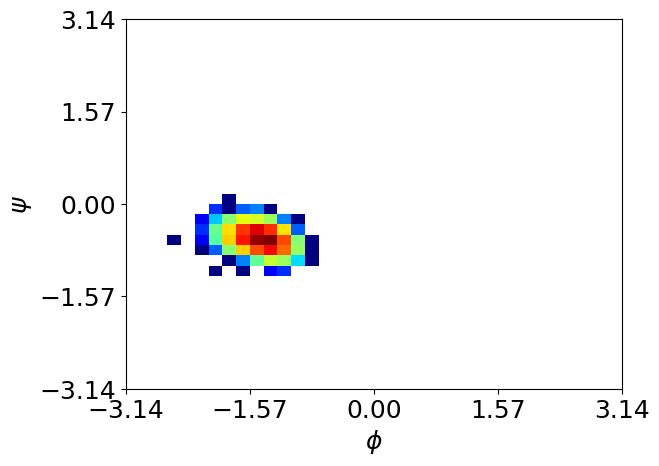

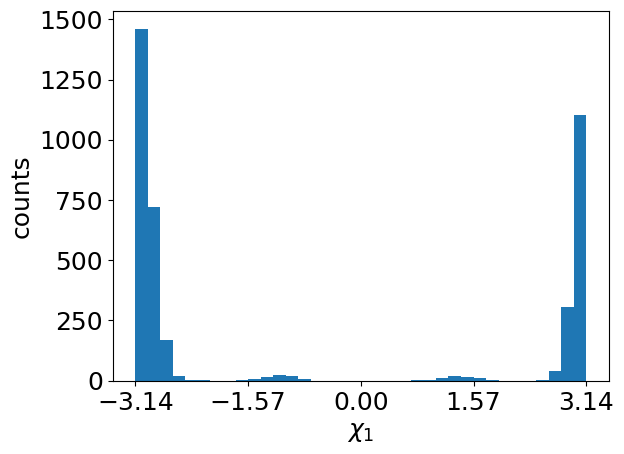

<Figure size 640x480 with 0 Axes>

In [42]:
for i in Val_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



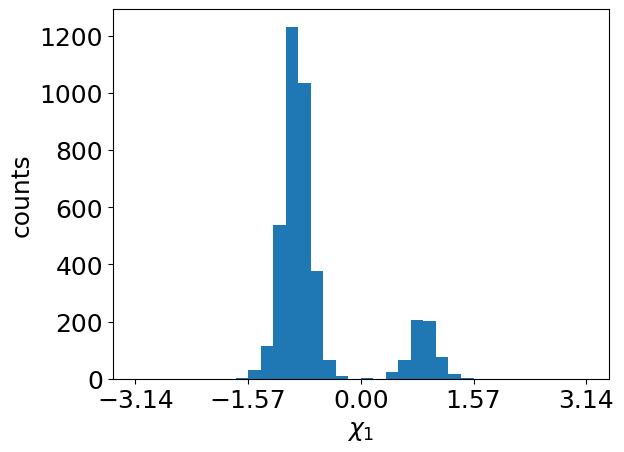

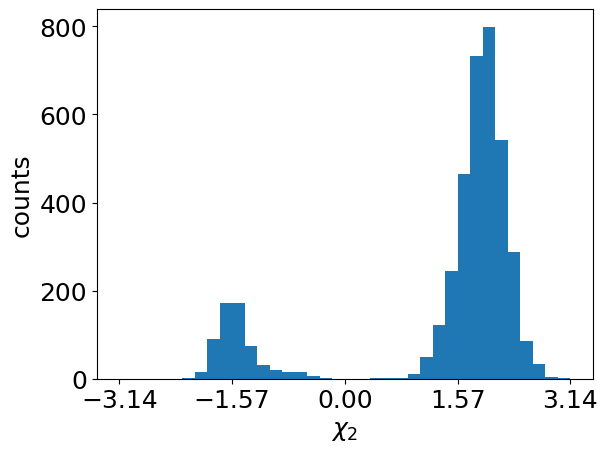

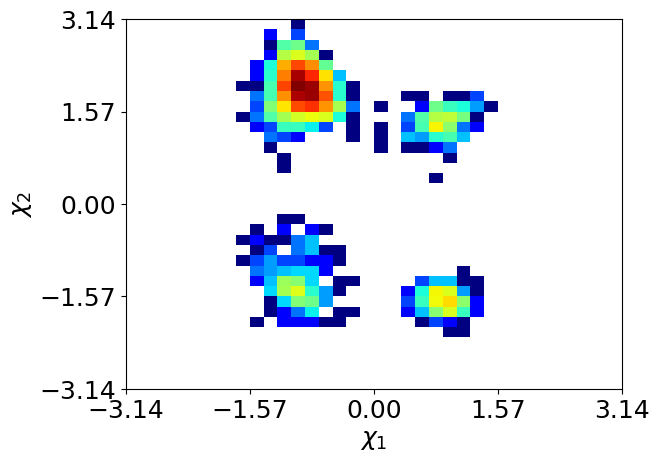

(array([   0,    1,    2, ..., 3816, 3817, 3818], dtype=int64),)
(array([  82,   89,   90,   91,   92,   93,   94,  104,  105,  106,  107,
        108,  109,  378,  693,  694,  695,  696,  697,  698,  744,  751,
        752,  883,  889,  903,  904,  905,  906,  907,  908,  909,  910,
        911,  912,  913,  914,  915,  916,  917,  918,  919,  920,  921,
        922,  923,  924,  925,  926,  927,  928,  929,  930,  931,  932,
        933,  934,  935,  936,  937,  938,  939,  940,  941,  942,  943,
        945,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972, 1103, 1106, 1107, 1109, 1110, 1111, 1112,
       1113, 1114, 1115, 1116, 1117, 1252, 1276, 1520, 1612, 1803, 2152,
       2264, 2356, 2362, 2363, 2364, 2365, 2366, 2368, 2369, 2370, 2371,
       2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382,
       2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 239

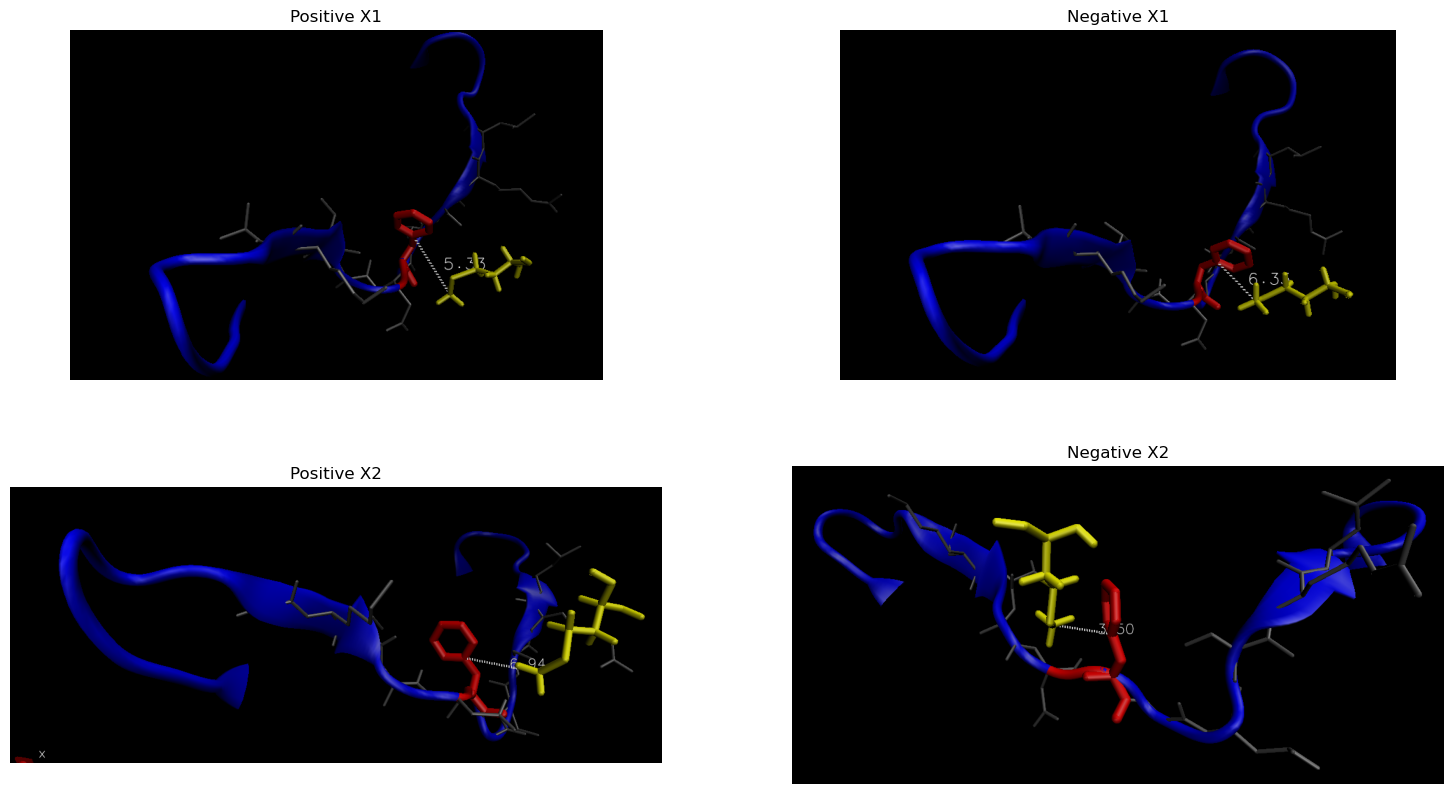

In [71]:
#Slightly editing the above plot_chi to display the X_2 histogram to see if Chi2 has a DoF

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()
    if res in dihedral_dict['chi2']:
     plt.hist(dihedral_dict['chi2'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_2$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return

plot_chi(382)

#For residue 382 specifically, we may define, very roughly, two bins from these graphs: where X1/X2 are greater or less than 1

rot_state_1_x1=np.where(dihedral_dict['chi1'][382] < 0)
rot_state_2_x1=np.where(dihedral_dict['chi1'][382] > 0)
print(rot_state_1_x1)
print(rot_state_2_x1)

#Similarly for X2,

rot_state_1_x2=np.where(dihedral_dict['chi2'][382] < 0)
rot_state_2_x2=np.where(dihedral_dict['chi2'][382] > 0)
print(rot_state_1_x2)
print(rot_state_2_x2)

img_positive_x1=np.asarray(Image.open('/ipynb_files/CHEM96_06/Project_2/photos/RES_382_POSITIVE.png'))
img_negative_x1=np.asarray(Image.open('/ipynb_files/CHEM96_06/Project_2/photos/RES_382_NEGATIVE.png'))
img_positive_x2=np.asarray(Image.open('/ipynb_files/CHEM96_06/Project_2/photos/RES_382_POSITIVE_X2.png'))
img_negative_x2=np.asarray(Image.open('/ipynb_files/CHEM96_06/Project_2/photos/RES_382_NEGATIVE_X2.png'))

fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5,10)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')                     
axs[0,0].title.set_text('Positive X1')
axs[0,1].title.set_text('Negative X1')
axs[1,0].title.set_text('Positive X2')
axs[1,1].title.set_text('Negative X2')
axs[0,0].imshow(img_positive_x1)
axs[0,1].imshow(img_negative_x1)
axs[1,0].imshow(img_positive_x2)
axs[1,1].imshow(img_negative_x2)

print("Like with residue 290, the orientation, and thus X-values, of residue 382 are constrained by the methionine-aromatic interaction")
print("The aromatic ring tends to cluster around the methionine, constraining X-values to those that allow such an interaction to occur")

***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**


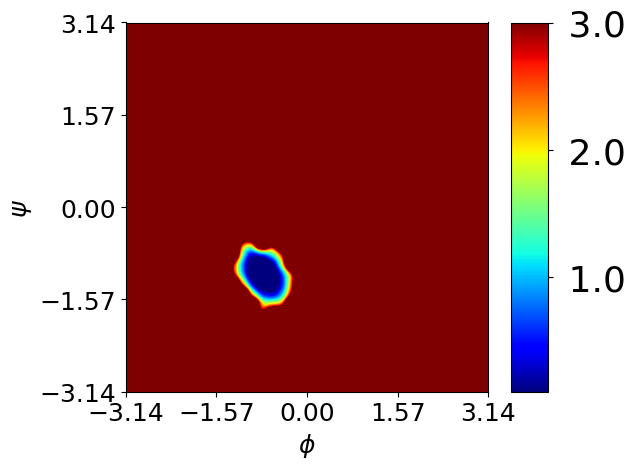

In [21]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(350)